In [1]:
import os 

import numpy as np
import pandas as pd

import librosa
import librosa.display

import matplotlib.pyplot as plt

import IPython.display as ipd

In [2]:
import torch
print(torch.__version__)


1.1.0


Examples
========

Streetmusic
-----------

In [3]:
ipd.Audio("data/train/Train/1.wav")

Drilling
--------

In [4]:
ipd.Audio("data/train/Train/2.wav")

Siren
-----

In [5]:
ipd.Audio("data/train/Train/3.wav")

Dog Bark
---------

In [6]:
ipd.Audio("data/train/Train/4.wav")

Children Playing
----------------

In [7]:
ipd.Audio("data/train/Train/6.wav")

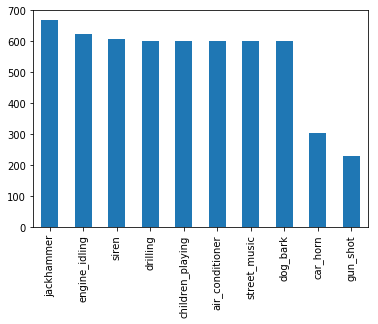

In [3]:
train_dir = "./data/train/"
test_dir = "./data/test/"

train_df = pd.read_csv(train_dir + 'train.csv')
train_ids = train_df['ID'].to_numpy()
test_ids = pd.read_csv(test_dir + 'test.csv')['ID'].to_numpy()

class_stats = train_df['Class'].value_counts()

r = class_stats.plot(kind='bar')

# Save as Spectogram

In [5]:
train_spec_dir = train_dir + 'spectograms/'
if not os.path.exists(train_spec_dir):
    os.makedirs(train_spec_dir)

test_spec_dir = test_dir + 'spectograms/'
if not os.path.exists(test_spec_dir):
    os.makedirs(test_spec_dir)

def get_duration_sr(wav_id):
    filename = train_dir + 'Train/' + str(wav_id) + '.wav'
    y,sr = librosa.load(filename, sr=None)
    dur = librosa.get_duration(y=y, sr=sr)
    return sr, dur

dur_sr = train_df['ID'].apply(get_duration_sr)

In [6]:
metadata_df = pd.DataFrame(dur_sr.to_list(), index=train_df.index, columns=['sample_rate', 'duration'])


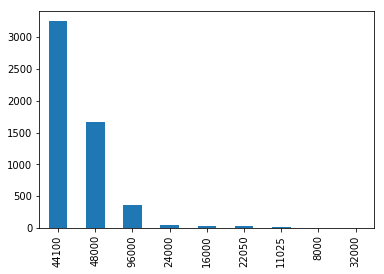

In [7]:
sr_stats = metadata_df['sample_rate'].value_counts()
r = sr_stats.plot(kind='bar')

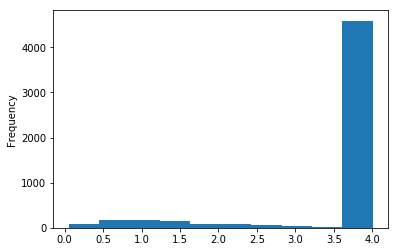

In [8]:
r = metadata_df['duration'].plot.hist()

In [19]:
import struct
from audio_helper import *

import audio_helper
from audio_helper import wav_info
# Now calls a first version of the function
# Then you change the function
import importlib
importlib.reload(audio_helper)
from audio_helper import wav_info




audio_info = train_df['ID'].apply(lambda x: wav_info(train_dir+'Train/'+str(x)+'.wav'))
audio_df = pd.DataFrame.from_records(audio_info)


print(audio_df)

      AudioFormat  BitsPerSample  BlockAlign  ByteRate  ChunkSize Filename  \
0               1             16           4    176400     705636            
1               1             16           2     96000     384036            
2               1             16           4    176400     705636            
3               1             16           4    176400     705636            
4               1             16           4    176400     705636            
5           65534             24           6    288000    1152072            
6               1             16           4    176400     705636            
7               1             16           4    176400     705636            
8               1             16           4    176400     200868            
9               1             16           4    176400     705636            
10          65534             24           6    576000    2304072            
11          65534             24           6    264600    105847

In [10]:
#train_df.apply(lambda x,y: print(y))

i = 1
for idx, row in train_df.iterrows():   
    filename = train_dir + 'Train/' + str(row['ID']) + '.wav' 
    y, sr = librosa.load(filename, sr=None)
    # trying to get as close as possible to 224x224
    fig = plt.figure(figsize=[0.72,0.72])

    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    
    Spec = librosa.feature.melspectrogram(y=y, sr=sr)
    librosa.display.specshow(librosa.power_to_db(Spec, ref=np.max))
    
    if not os.path.exists(train_spec_dir + row['Class']):
        os.makedirs(train_spec_dir + row['Class'])
    
    save_file = train_spec_dir + row['Class'] + '/' + str(row['ID']) + '.png'
    plt.savefig(save_file, format='png',dpi=400, bbox_inches='tight',pad_inches=0)
    
    if i % 100 == 0:
        print("Processed {} wav files".format(i))
    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    
    i += 1

    # Otherwise it uses ~27GB of memory
    del filename,y,sr
    del fig,ax
    del Spec

Processed 100 wav files
Processed 200 wav files
Processed 300 wav files
Processed 400 wav files
Processed 500 wav files
Processed 600 wav files
Processed 700 wav files
Processed 800 wav files
Processed 900 wav files
Processed 1000 wav files
Processed 1100 wav files
Processed 1200 wav files
Processed 1300 wav files
Processed 1400 wav files
Processed 1500 wav files
Processed 1600 wav files
Processed 1700 wav files
Processed 1800 wav files
Processed 1900 wav files
Processed 2000 wav files
Processed 2100 wav files
Processed 2200 wav files
Processed 2300 wav files
Processed 2400 wav files
Processed 2500 wav files
Processed 2600 wav files
Processed 2700 wav files
Processed 2800 wav files
Processed 2900 wav files
Processed 3000 wav files
Processed 3100 wav files
Processed 3200 wav files
Processed 3300 wav files
Processed 3400 wav files
Processed 3500 wav files
Processed 3600 wav files
Processed 3700 wav files
Processed 3800 wav files
Processed 3900 wav files
Processed 4000 wav files
Processed